<center> <h1> Predicting House Prices with ML</h1></center>

## Introduction


This notebook is going to be focused on solving the problem of predicting prices for houses. 

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we are going to take advantage of all the feature variables to analyze and predict house prices. 

For easy comprehension, have a look in all the steps we are going to follow:

1. Undertanding the Client Problem
2. Loading Data and Packages
3. Analyzing the  Target Values (Sale Price)
4. Multivariable Analysis
5. Feature Engineering Pipeline Configuration
6. Modeling and Predictions


## 1. Understanding The Client Problem

Pricing is one of the most difficult decision when your try to lauch a product or simply sell the one you have in your portfolio. When your are at real state market, you use have clients that want a new house for leaving and others for resell it. 
This project is set to help this two types of clients to make the right descision by considering the following perspectives:

Client Housebuyer: This client wants to find their next dream home with a reasonable price tag. And so, they want to know if the house price matches the house value. With this study, they'll be able to understand which features (ex. Number of bathrooms, location, etc.) influence the final price of the house. If all matches, they can ensure that they are getting a fair price.

Client Houseseller: Think of the average house-flipper. This client wants to take advantage of the features that influence a house price the most. They typically want to buy a house at a low price and invest on the features that will give the highest return. For example, buying a house at a good location but small square footage. The client will invest on making rooms at a small cost to get a large return.







## 2. Loading Data and Packages


In [1]:
#to handle dataset
import pandas as pd
import numpy as np

# for plotting

import matplotlib.pyplot as plt
import seaborn as sns

# For warnings

import warnings

# for saving the pipeline
import joblib

# for the yeo-johnson transformation
import scipy.stats as stats

# from Scikit-learn
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#to display all the columns of the dataframe in the notebook

pd.pandas.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')



In [2]:
# Data Description
path = './Data/data_description.txt'
with open(path ,'r') as f: 
    print(f.read())
    

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
#load dataset
df = pd.read_csv('./Data/train.csv')

#rows and columns of the data

print(df.shape)

# visualise the dataset

df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# drop id, it's just a number given to identify each house
df.drop("Id", axis = 1, inplace = True)
# Cast MSSubClass as object
df['MSSubClass'] = df['MSSubClass'].astype('O')
df.shape

(1460, 80)

## 3. Analyzing the  Target Values (Sale Price)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Getting Description
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

With an average house price of $\$$180921,00.  it's bellow the the typical value of U.S. homes witch was $269,039 in January 2021, 

according to Zillow(https://worldpopulationreview.com/state-rankings/median-home-price-by-state).


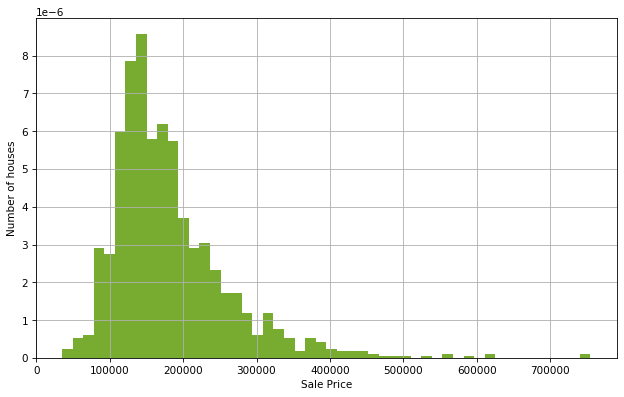

In [7]:
#histogran to evaluate target distribution
plt.figure(figsize=(10,6), dpi = 75)
df['SalePrice'].hist(bins=50, density=True, FaceColor= '#77AC30')
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')

plt.show()

We can see that the target is continues, and the distribuiton is skewed towards the right.

We can improve the value spread with a log transformation. 

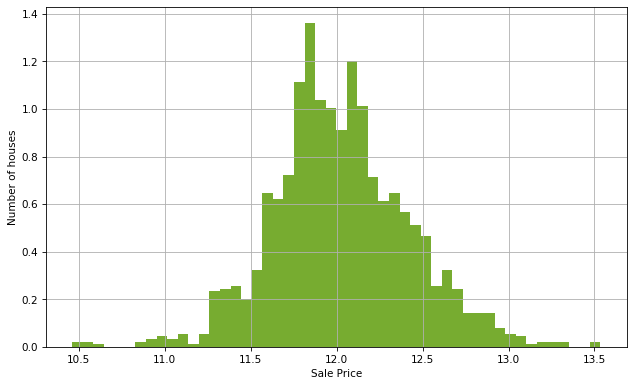

In [8]:
plt.figure(figsize=(10,6), dpi = 75)
np.log(df.iloc[:,-1]).hist(bins=50, density=True, FaceColor= '#77AC30')
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')

plt.show()

## 4. Multivariable Analysis

Let's check out all the variables! There are two types of features in housing data, categorical and numerical.


In [9]:
# Checking Categorical Vars

cat_vars = df.select_dtypes(include=['object']).columns

print(f"Qtd Categorical Vars: {len(cat_vars)}")
print()
print(cat_vars)


Qtd Categorical Vars: 44

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
num_vars = [var for var in df.columns if var not in cat_vars and var != 'SalePrice']
num_vars

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### Missing Data

In [11]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=False)
    return percent_nan

In [12]:
percent_nan = percent_missing(df)
percent_nan

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

(0.0, 1.0)

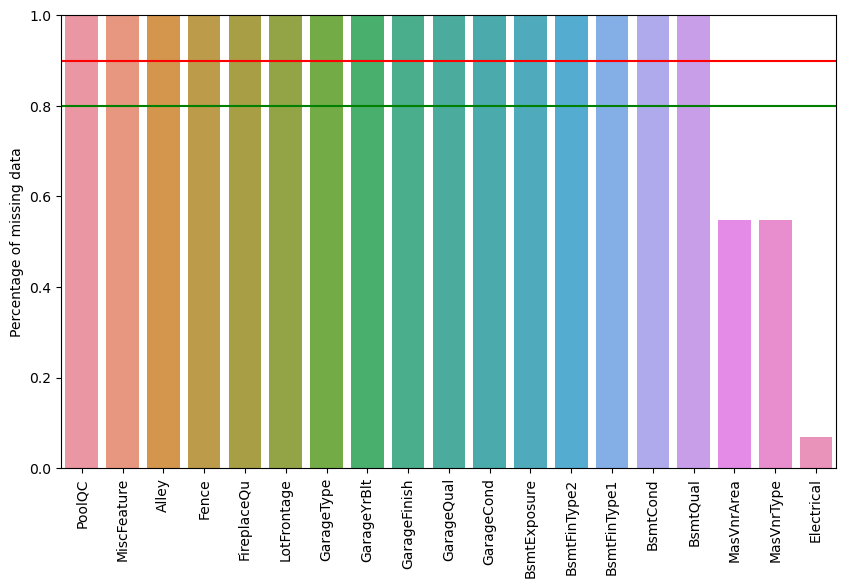

In [13]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.xticks(rotation=90)
plt.ylim(0,1)

In [14]:
# Now we can determine wich variable, from those with missing data, are numerical or categorical

# Getting all cat and num vars
print(f"Number of Cateforical: {len(cat_vars)}, Number of Numberical: {len(num_vars)}")


cat_na = [var for var in cat_vars if var in percent_nan]
num_na = [var for var in num_vars if var in percent_nan]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))


Number of Cateforical: 44, Number of Numberical: 35
Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [15]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

#### Numberical Variables

We can devide them in: Temporal variables, Discrete variables and Continuous variables
    

In [17]:
print(f"NUmber of Numberical Variables: {len(num_vars)}")
num_vars

NUmber of Numberical Variables: 35


['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### Categorical variables

In [18]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  44


In [19]:
# let's visualise the values of the categorical variables
df[cat_vars].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
####Number of labels: cardinality

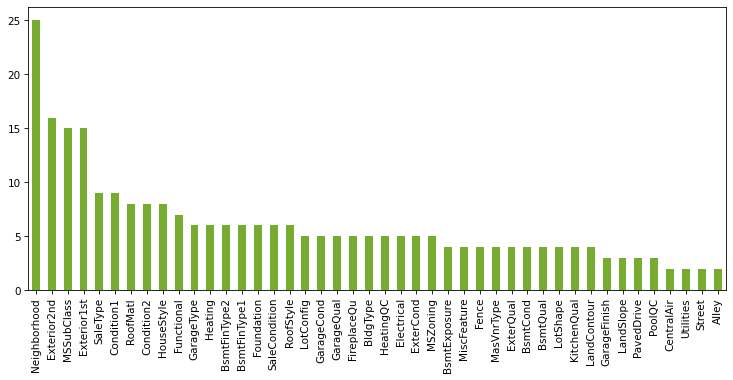

In [21]:
plt.figure(figsize=(10,6), dpi=75)
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5),  FaceColor= '#77AC30')
plt.xticks(rotation=90)
plt.show()


All the categorical variables show low cardinality, this means that they have only few different labels. 

# 5. Feature Engineering Pipeline Configuration

Preprocessors Classes
Separate dataset into train and test

## Import Train Data

In [22]:
FEATURES = [
    'MSSubClass',
    'MSZoning',
    'LotShape',
    'LandContour',
    'LotConfig',
    'Neighborhood',
    'GarageFinish',
    'PavedDrive',
    'SaleCondition',
    'KitchenQual',
    'FireplaceQu',
    'LotFrontage',
    'OverallQual',
    'OverallCond',
    'YearRemodAdd',
    'TotRmsAbvGrd',
    'HalfBath',
    'WoodDeckSF',
    'ScreenPorch',
    'YrSold',
   'SalePrice',
]


In [23]:
#load dataset
df = pd.read_csv('./Data/train.csv')
# drop id, it's just a number given to identify each house
df.drop("Id", axis = 1, inplace = True)
# Cast MSSubClass as object
df['MSSubClass'] = df['MSSubClass'].astype('O')
df.shape

(1460, 80)

In [24]:
df = df[FEATURES]
df

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,GarageFinish,PavedDrive,SaleCondition,KitchenQual,FireplaceQu,LotFrontage,OverallQual,OverallCond,YearRemodAdd,TotRmsAbvGrd,HalfBath,WoodDeckSF,ScreenPorch,YrSold,SalePrice
0,60,RL,Reg,Lvl,Inside,CollgCr,RFn,Y,Normal,Gd,NaN,65.0,7,5,2003,8,1,0,0,2008,208500
1,20,RL,Reg,Lvl,FR2,Veenker,RFn,Y,Normal,TA,TA,80.0,6,8,1976,6,0,298,0,2007,181500
2,60,RL,IR1,Lvl,Inside,CollgCr,RFn,Y,Normal,Gd,TA,68.0,7,5,2002,6,1,0,0,2008,223500
3,70,RL,IR1,Lvl,Corner,Crawfor,Unf,Y,Abnorml,Gd,Gd,60.0,7,5,1970,7,0,0,0,2006,140000
4,60,RL,IR1,Lvl,FR2,NoRidge,RFn,Y,Normal,Gd,TA,84.0,8,5,2000,9,1,192,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Reg,Lvl,Inside,Gilbert,RFn,Y,Normal,TA,TA,62.0,6,5,2000,7,1,0,0,2007,175000
1456,20,RL,Reg,Lvl,Inside,NWAmes,Unf,Y,Normal,TA,TA,85.0,6,6,1988,7,0,349,0,2010,210000
1457,70,RL,Reg,Lvl,Inside,Crawfor,RFn,Y,Normal,Gd,Gd,66.0,7,9,2006,9,0,0,0,2010,266500
1458,20,RL,Reg,Lvl,Inside,NAmes,Unf,Y,Normal,Gd,NaN,68.0,5,6,1996,5,0,366,0,2010,142125


In [25]:
# Checking Categorical Vars

cat_vars = df.select_dtypes(include=['object']).columns

print(f"Qtd Categorical Vars: {len(cat_vars)}")
print()
print(cat_vars)


Qtd Categorical Vars: 11

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'GarageFinish', 'PavedDrive', 'SaleCondition',
       'KitchenQual', 'FireplaceQu'],
      dtype='object')


In [26]:
num_vars = [var for var in df.columns if var not in cat_vars and var != 'SalePrice']
num_vars

['LotFrontage',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'HalfBath',
 'WoodDeckSF',
 'ScreenPorch',
 'YrSold']

## Separate dataset into train and test

In [27]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['SalePrice'], axis=1), # predictive variables
    df['SalePrice'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((1314, 20), (146, 20))

## Target

In [28]:
# We apply the logarithm

y_train = np.log(y_train)
y_test = np.log(y_test)

## Pipeline


In [29]:
numerical_pipeline = Pipeline([
    ('numerical_imputer', SimpleImputer(strategy='median')),
    ('feature_scaling', StandardScaler())
])

In [30]:
categorical_pipeline = Pipeline([
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    ('categorical_encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [31]:
column_pipeline = ColumnTransformer([
    ("numerical_pipeline", numerical_pipeline, num_vars),
    ("categorical_pipeline", categorical_pipeline, cat_vars)
])

In [32]:
full_pipeline = Pipeline([
    ('column_transformer', column_pipeline),
    ('Lasso', Lasso(alpha=0.001, random_state=0)),
])

In [33]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('feature_scaling',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'OverallQual',
                                                   'OverallCond',
                                                   'YearRemodAdd',
                                                   'TotRmsAbvGrd', 'HalfBath',
                                                   'WoodDeckSF', 'ScreenPorch',
                                                   'YrSold']),
                                                 ('categorical_pipeline',
               

In [34]:
# determine mse, rmse and r2
pred = full_pipeline.predict(X_train)

print(f"train mse: {int(mean_squared_error(np.exp(y_train), np.exp(pred)))}")
print(f"train rmse: {int(mean_squared_error(np.exp(y_train), np.exp(pred), squared= False))}")
print(f"train r2: {r2_score(np.exp(y_train), np.exp(pred))}")
print()

print(f"Average house price {int(np.exp(y_train).median())}")

print()

pred = full_pipeline.predict(X_test)

# determine mse, rmse and r2

print(f"test mse: {int(mean_squared_error(np.exp(y_test), np.exp(pred)))}")
print(f"test rmse: {int(mean_squared_error(np.exp(y_test), np.exp(pred), squared= False))}")
print(f"test r2: {r2_score(np.exp(y_test), np.exp(pred))}")

print()

train mse: 999311151
train rmse: 31611
train r2: 0.8399522647152359

Average house price 163000

test mse: 1391460825
test rmse: 37302
test r2: 0.7975207388926309



Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

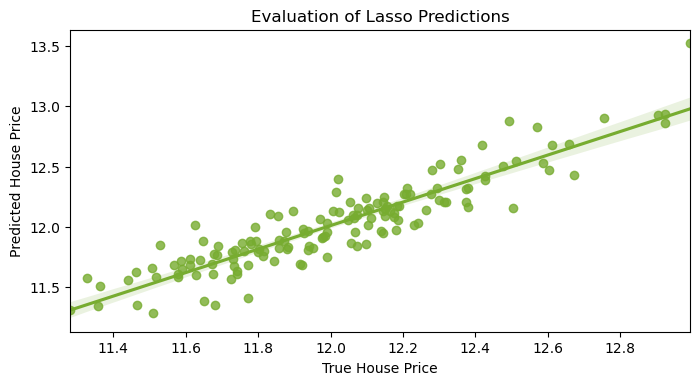

In [35]:
# let's evaluate our predictions respect to the real sale price

plt.figure(figsize=(8,4), dpi = 100)
sns.regplot(x=full_pipeline.predict(X_test), y= y_test, color='#77AC30')
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [36]:
# now let's save the scaler
joblib.dump(full_pipeline, 'price_pipe.pkl')

['price_pipe.pkl']